# Table of Contents
* [1) Vectors](#1%29-Vectors)
* [2) Matrices](#2%29-Matrices)	

# Linear Algebra

In [5]:
# %load ../../code/linear_algebra.py
%matplotlib inline
from __future__ import division # want 3 / 2 == 1.5
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial

# 1) Vectors

In [23]:
# 
# functions for working with vectors
#

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum_1(vectors):
    """sums all corresponding elements"""
    result = vectors[0] # start with the first vector
    for vector in vectors[1:]: # then loop over the others
        result = vector_add(result, vector) # and add them to the result
    return result

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

# this isn't right if you don't from __future__ import division
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

In [ ]:
height_weight_age = [70, # inches,
                    170, # pounds,
                    40 ] # years

grades = [95, # exam1
         80, # exam2
         75, # exam3
         62 ] # exam4

x1 = [1,2,3]
x2 = [4,5,6,11]
x3 = [8,9,10,15]

In [80]:
def vector_test():
    print "All vectors:"
    print height_weight_age
    print grades
    print x1
    print x2
    print x3
    print "\n"
    # Add vector
    print "Add vector: \n", vector_add(height_weight_age, grades)
    
    # Subtract vector
    print "\nSubtract vector: \n", vector_subtract(height_weight_age, grades)
    
    # Sum a list of vectors
    print "\nSum a list of vectors: \n", vector_sum_1([height_weight_age, grades])
    print "Sum a list of vectors: \n", vector_sum([x1, x2, x3])
    
    # Scalar multiply
    print "\nScalar multiply: \n", scalar_multiply(3, height_weight_age)
    
    # Vector mean
    print "\nVector mean: \n", vector_mean([height_weight_age, grades])
    print "Vector mean: \n", vector_mean([x1, x2, x3])
    
    # Dot function
    print "\nDot function: \n", dot(height_weight_age, grades)
    
    # Sum of squares
    print "\nSum of squares: \n", sum_of_squares(height_weight_age)
    
    # Magnitude
    print "\nMagnitude: \n", magnitude(height_weight_age)
    
    # Square distance
    print "\nSquare distance: \n", squared_distance(height_weight_age, grades)
    
    # distance
    print "\nDistance: \n", distance(height_weight_age, grades)

In [81]:
vector_test()

All vectors:
[70, 170, 40]
[95, 80, 75, 62]
[1, 2, 3]
[4, 5, 6, 11]
[8, 9, 10, 15]


Add vector: 
[165, 250, 115]

Subtract vector: 
[-25, 90, -35]

Sum a list of vectors: 
[165, 250, 115]
Sum a list of vectors: 
[13, 16, 19]

Scalar multiply: 
[210, 510, 120]

Vector mean: 
[82.5, 125.0, 57.5]
Vector mean: 
[4.333333333333333, 5.333333333333333, 6.333333333333333]

Dot function: 
23250

Sum of squares: 
35400

Magnitude: 
188.148877222

Square distance: 
9950

Distance: 
99.7496867163


# 2) Matrices

In [82]:
#
# functions for working with matrices
#

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]
    
def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) # given i, create a list
            for j in range(num_cols)] # [entry_fn(i, 0), ... ]
            for i in range(num_rows)]  # create one list for each i

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

In [17]:
identity_matrix = make_matrix(5, 5, is_diagonal)
print shape(identity_matrix)
print get_row(identity_matrix, 0)
print get_column(identity_matrix, 0)
identity_matrix

(5, 5)
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]


[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [85]:
#          user 0  1  2  3  4  5  6  7  8  9
#
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

# matrices can be used to represent binary relationships
print friendships[0][2] == 1 # True, 0 and 2 are friends
print friendships[0][8] == 1 # False, 0 and 8 are not friends
friends_of_five = [i # only need
                    for i, is_friend in enumerate(friendships[5]) # to look at
                    if is_friend] # one row
print friends_of_five

True
False
[4, 6, 7]


In [86]:
#####
# DELETE DOWN
#

def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)


def make_graph_dot_product_as_vector_projection(plt):

    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(vâ¢w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis('equal')
    plt.show()

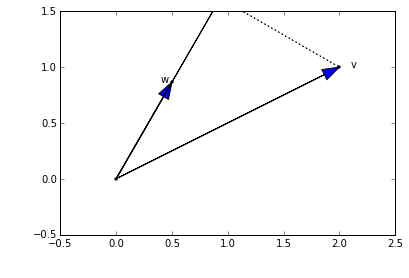

In [87]:
make_graph_dot_product_as_vector_projection(plt)